Este cuaderno, es para desarrollar los algoritmos de limpieza de datos, pero sin hacer aún la conexión con la BD de AWS.

<br>

Es decir, sirve para que al implementar los algoritmos de limpieza sea muy rapido (copiar y pegar)

# **Importamos las dependencias**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.impute import SimpleImputer # Ayuda a manejar valores faltantes en conjuntos de datos
from scipy.stats import ks_2samp # Realiza la prueba de Kolmogorov-Smirnov (continuos)
from scipy.stats import chi2_contingency # Realiza la prueba chi-cuadrado de independencia entre dos variables categóricas (discretos)


# **Lectura de datos**

In [3]:
df = pd.read_csv('datos_sucios.csv')

In [143]:
df2 = pd.read_excel("Datos de clientes (DataSet).xlsx")

In [4]:
# Vemos los primeros datos
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,NaN,0.0,689.0,NaN,0.0,0.0,0.0,1.0
1,120000.0,NaN,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,NaN,1000.0,NaN,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,NaN,2.0,2.0,1.0,37.0,0.0,0.0,0.0,NaN,0.0,...,NaN,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,NaN,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,NaN,679.0,0.0


In [144]:
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **Análisis exploratorio de datos**

### Conteo de los NaN

In [146]:
# Contamos los valores faltantes por columna
df.isna().sum()

LIMIT_BAL                     4500
SEX                           4500
EDUCATION                     4500
MARRIAGE                      4500
AGE                           4500
PAY_0                         4500
PAY_2                         4500
PAY_3                         4500
PAY_4                         4500
PAY_5                         4500
PAY_6                         4500
BILL_AMT1                     4500
BILL_AMT2                     4500
BILL_AMT3                     4500
BILL_AMT4                     4500
BILL_AMT5                     4500
BILL_AMT6                     4500
PAY_AMT1                      4500
PAY_AMT2                      4500
PAY_AMT3                      4500
PAY_AMT4                      4500
PAY_AMT5                      4500
PAY_AMT6                      4500
default_payment_next_month    4500
dtype: int64

### Graficación de las variables

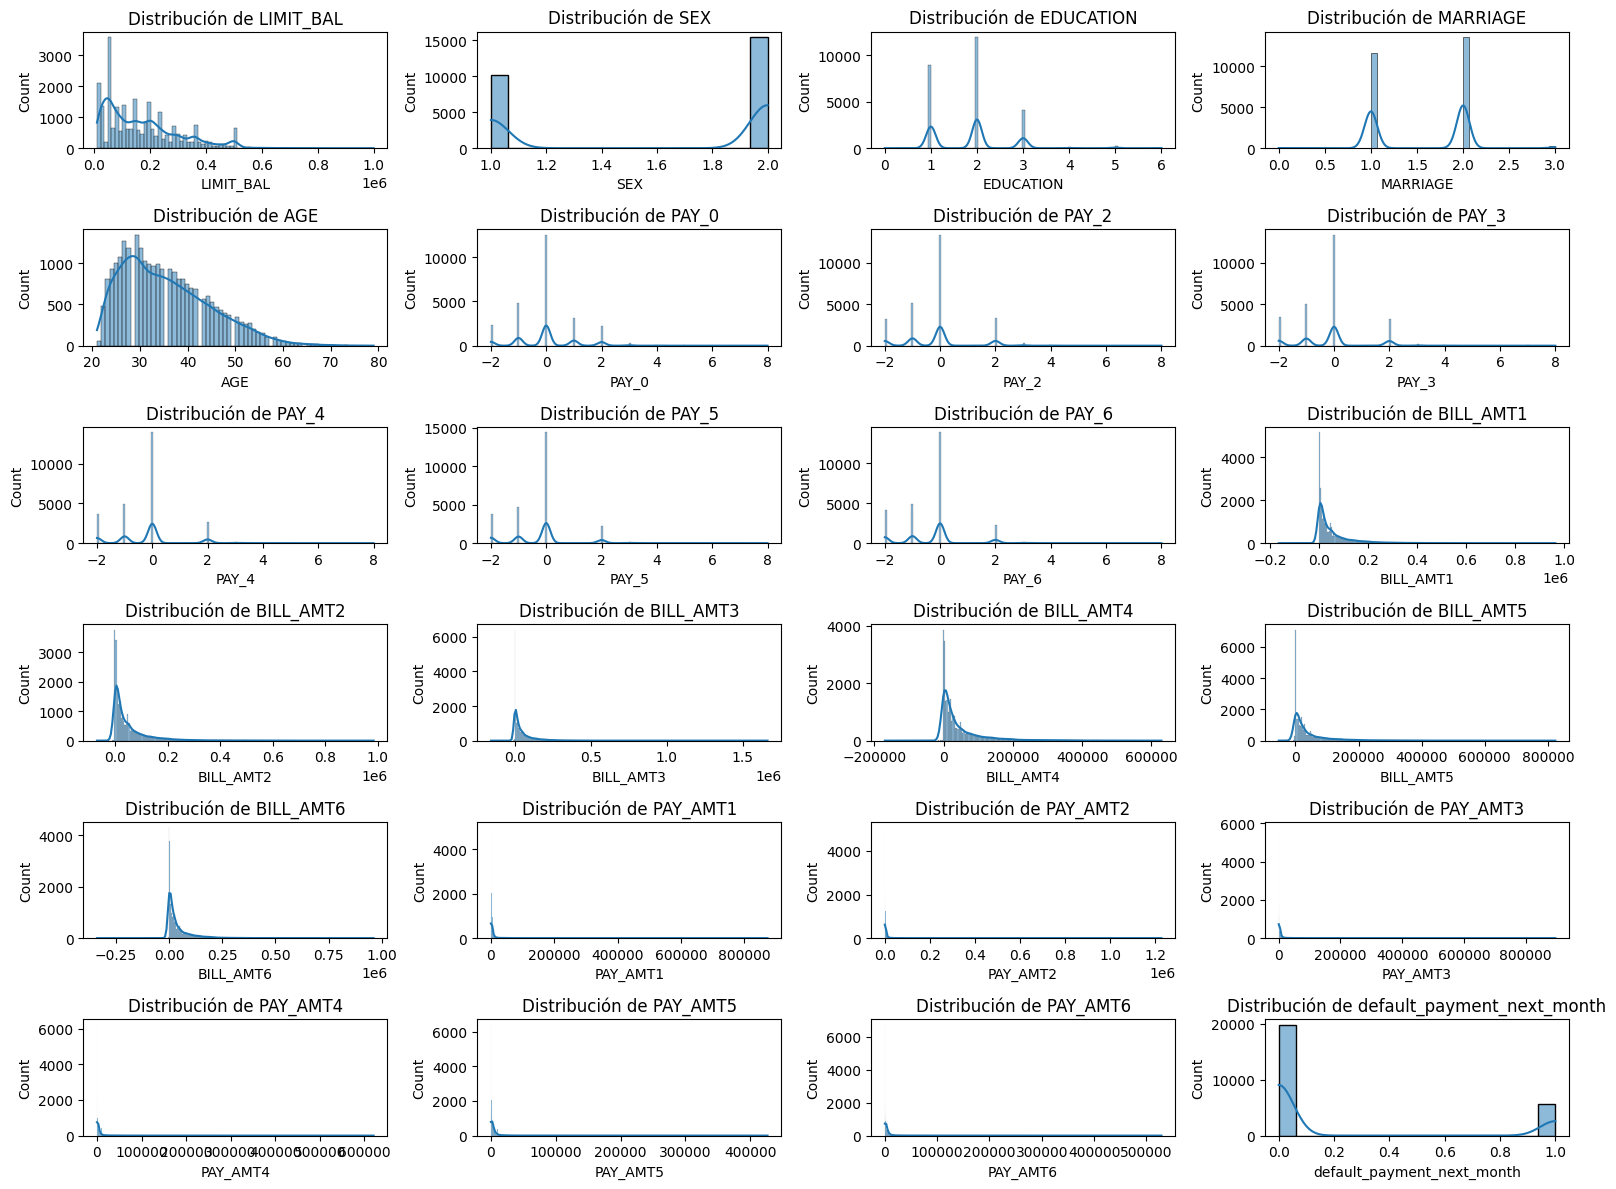

In [6]:
# Veamos sus distribuciones de probabilidad


# Creamos la figura y los subplots
fig, axes = plt.subplots(nrows = 6, ncols = 4, figsize = (16, 12)) # 6 filas X 4 Columnas = 24 figuras


# Iteramos sobre las columnas y sus ínidices
for i, columna in enumerate(df.columns):

    """
    Aquí, como tenemos 6 filas y 4 columnas, queremos que cada gráfica esté en una fila
    y una columna particular, entonces calculamos que se acomoden en 'paquetes'    
    """
    fila = i//4 # Calcula la fila del subplot
    columna_subplot = i%4 # Calcula la columna del subplot

    """
    -> ax = axes[...] especifica el subplot donde se debe de graficar
    -> kde=True muestra la estimación de densidad
    """

    sns.histplot(df[columna], kde = True, ax = axes[fila, columna_subplot]) 
    axes[fila, columna_subplot].set_title(f'Distribución de {columna}')


# Ajusta el layout para evitar superposición de elementos
plt.tight_layout()

# Muestra el gráfico
plt.show()


Al ver las gráficas, sospechamos que hay valores atípicos en algunas de las columnas del DataFrame, mas adelante lo revisaremos a detalle

### Clasificación de las variables y tratatmiento de los NaN

##### **Discretas**

In [ ]:
# Un método rapido para clasificar las variables de un DataFrame, es con el método '.describe'
# En teoría nos da las variables contínuas
df.describe().columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

No hay una correcta asiganción de tipo de datos a las columnas del DataFrame, entonces de acuerdo al contexto del problema nosotros vamos a hacer la clasificación 

**Imputación de los valores faltantes**

In [153]:
# De la columna 'SEX'


# Creamos un DataFrame auxiliar en dónde vamos a guardar los valores de nuestra columna
X = df[['SEX']]

"""
Creamos un objeto 'im' de la clase SimpleImputer de la librería scikit-learn. 

'strategy': Define la estrategia de imputación. 

Hay varias estrategias, dependiendo del problema una puede funcionar mejor que otra
"""
im = SimpleImputer(strategy = 'most_frequent') # Usamos la moda (most_frequent)



"""
-) im.fit(X): Ajusta el objeto 'im' (el SimpleImputer) a los datos en el DataFrame X. 
   
-) transform(X): Transforma el DataFrame X utilizando el objeto 'im' ajustado (en resumen, reemplaza los valores faltantes). 

-) pd.DataFrame(...): Convierte el resultado de transform(X) en un nuevo DataFrame llamado Xi.

-) columns=['...']: Define las columnas del nuevo DataFrame Xi.

En resumen, esta línea de código crea un nuevo DataFrame Xi que contiene los valores faltantes de la variable de interes 
del DataFrame original X imputados con la estrategia.
El DataFrame Xi no solo contiene los datos faltantes imputados, sino que contiene todos los datos del DataFrame original X 
con los valores NaN imputados.
"""
# Xi=pd.DataFrame(de_donde_haremos_el_data_frame, nombre_de_las_columnas)
Xi = pd.DataFrame(im.fit_transform(X), columns=['SEX']) 


Hacemos la prueba estadística

<br>

Recuerda que:

* **Hipótesis nula ($H_{0}$):** Las dos variables categóricas son independientes. No existe una asociación entre ellas.

* **Hipótesis alternativa ($H_{1}$):** Las dos variables categóricas no son independientes. Existe una asociación entre ellas.

Y vamos decidir con el p-value:

* Si el p-valor es menor que el nivel de significancia, se rechaza la hipótesis nula y se concluye que existe una asociación estadísticamente significativa entre las dos variables categóricas.

* Si el p-valor es mayor que α, no se rechaza la hipótesis nula y no se puede concluir que exista una asociación estadísticamente significativa entre las dos variables categóricas.

<br>

Al hacer una imputación de datos, queremos que los datos que agregamos no alteren de manera significativa a nuestra distribución original. Entonces queremos que se cumpla $H_{0}$ (o en otras palabras que: $p-value > \alpha$ ).

Si no se cumple eso, significa que la imputación alteró la distribución de tus datos, lo cual no queremos.

In [154]:
# Creamos la tabla de contingencia, con los datos imputados, y los originales
tabla_de_contingencia = pd.crosstab(Xi['SEX'], X['SEX'])

In [155]:
# Hacemos la prueba de la chi cuadrada
chi2, p, grados_de_libertad, v_esperados = chi2_contingency(tabla_de_contingencia)

print(f"El valor estadístico es de: {chi2}\nEl p-value es de: {p}\nLos grados de libertad son: {grados_de_libertad}")

El valor estadístico es de: 25495.820712217945
El p-value es de: 0.0
Los grados de libertad son: 1


In [156]:
if p < 0.1:
    print("Intenta con otra métrica, esta imputacíon no sirve")

else:
    print("Nuestra imputación fue correcta, i.e., no afecta a la distribución")

Intenta con otra métrica, esta imputacíon no sirve


Veamos como cambia la distribución

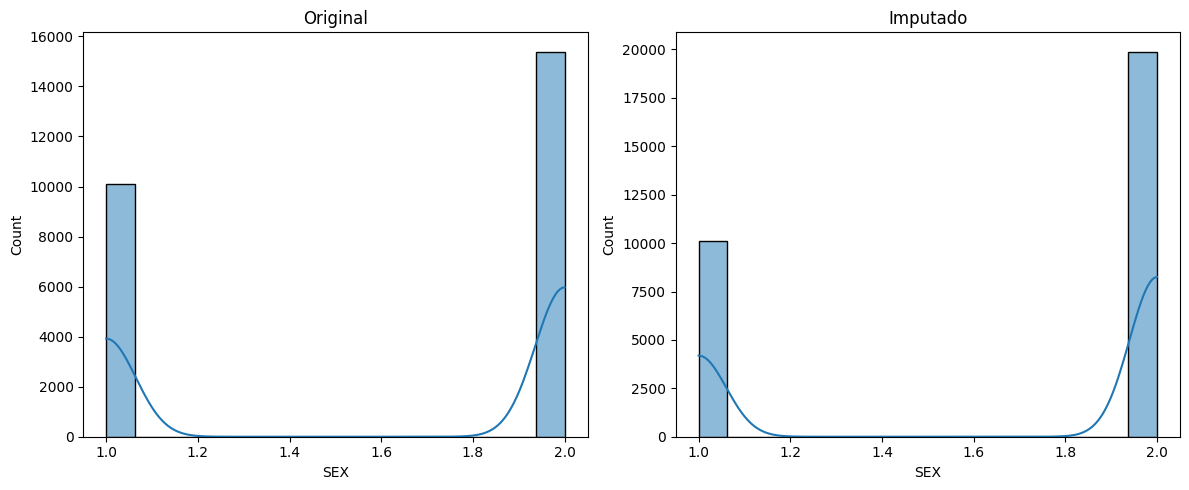

In [157]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5)) 


sns.histplot(X['SEX'], kde = True, ax = axes[0])
axes[0].set_title('Original')

sns.histplot(Xi['SEX'], kde = True, ax = axes[1])
axes[1].set_title('Imputado')


# Ajusta el layout para evitar superposición de elementos
plt.tight_layout()

# Muestra el gráfico
plt.show()


La imputación de los datos sesga mucho la distribución del sexo hacia las mujeres, ya que el $1.0$ se mantiene en el mismo lugar en la escala, mientras que el $2.0$ va de menos de $16,000$ a casi $20,000$

<br>

Vamos a probar hacer la imputación usando la proporción original de las variables, a ver si eso funciona

In [ ]:
freqs = X['SEX'].value_counts(normalize=True)  # Obtener proporciones de 1 y 2
freqs

SEX
2.0    0.603608
1.0    0.396392
Name: proportion, dtype: float64

In [160]:
# Hacemos una copia de 'X'
Xi = X['SEX'].copy()

# Hacemos la imputación de los datos
Xi = Xi.apply(lambda x: np.random.choice([1, 2], p = [freqs[1], freqs[2]]) if pd.isna(x) else x)

# Casteamos la variable Xi de serie a DataFrame
Xi = Xi.to_frame()

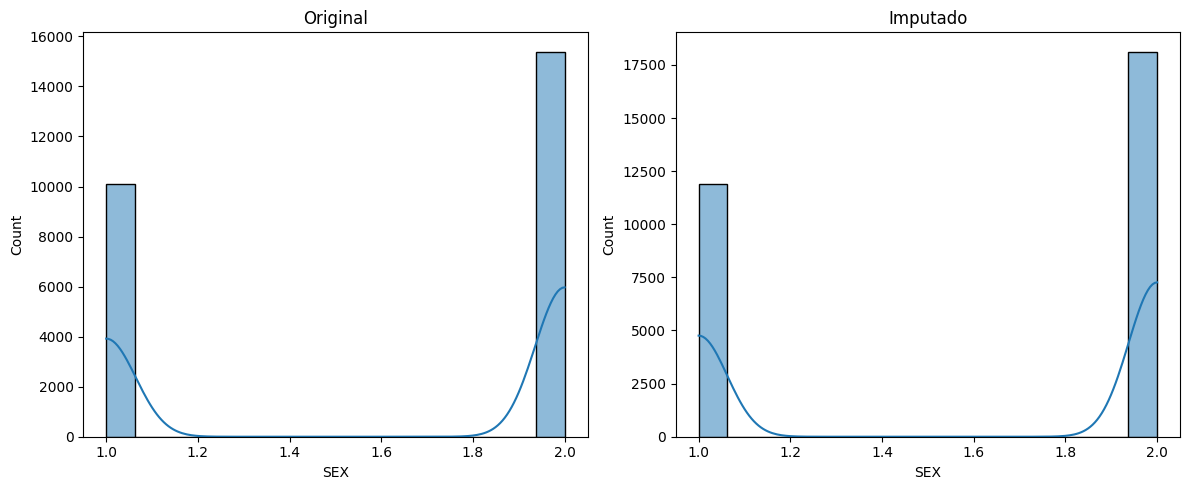

In [161]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5)) 


sns.histplot(X['SEX'], kde = True, ax = axes[0])
axes[0].set_title('Original')

sns.histplot(Xi['SEX'], kde = True, ax = axes[1])
axes[1].set_title('Imputado')


# Ajusta el layout para evitar superposición de elementos
plt.tight_layout()

# Muestra el gráfico
plt.show()

In [167]:
# Antes de hacer la prueba estadística, veamos si se conservaron las proporciones  entre hombre y mujer

freqs = X['SEX'].value_counts(normalize=True)  # Obtenemos proporciones de la columna con NaN's
new_freqs = Xi['SEX'].value_counts(normalize=True) # Obtenemos proporciones de la columna imputada

print(freqs, new_freqs)

SEX
2.0    0.603608
1.0    0.396392
Name: proportion, dtype: float64 SEX
2.0    0.6042
1.0    0.3958
Name: proportion, dtype: float64


In [168]:
tabla_de_contingencia = pd.crosstab(Xi['SEX'], X['SEX'])

# Hacemos la prueba de la chi cuadrada
chi2, p, grados_de_libertad, v_esperados = chi2_contingency(tabla_de_contingencia)

print(f"El valor estadístico es de: {chi2}\nEl p-value es de: {p}\nLos grados de libertad son: {grados_de_libertad}")

El valor estadístico es de: 25495.820712217945
El p-value es de: 0.0
Los grados de libertad son: 1


Debido a que con niguna imputación pasa la prueba, vamos a elegir esta última imputación, ya que al menos matiene la proporción entre las clases de hombre y mujer de una manera mas fiel que las otras imputaciones.

In [170]:
# Guardamos los datos imputados en el df original
df['SEX'] = Xi['SEX']

In [172]:
# Verificamos que no haya NaN
df['SEX'].isna().sum()

np.int64(0)

In [ ]:
df['SEX'].astype(int)
df['EDUCATION'].astype(int)
df['MARRIAGE'].astype(int)
df['AGE'].astype(int)
df['default_payment_next_month'].astype(int)
